##Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#Collecting Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install split_folders[full]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import splitfolders
input_folder='/content/drive/MyDrive/flower_photos'
splitfolders.ratio(input_folder,'/content/drive/MyDrive/flowers_Rec2',seed=1337,ratio=(0.7,0.2,0.1))

Copying files: 3670 files [21:43,  2.81 files/s]


###Data Preprocessing

###Training Image preprocessing

In [ ]:
# Chargement des ensembles de données
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/flowers_Rec2/train',
    labels="inferred",
    label_mode="categorical",
    class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
    color_mode="rgb",
    batch_size=64,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 2934 files belonging to 5 classes.


###Validation Image preprocessing

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/flowers_Rec2/val',
    labels="inferred",
    label_mode="categorical",
    class_names=['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
    color_mode="rgb",
    batch_size=64,
    image_size=(150, 150),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1099 files belonging to 5 classes.


###Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5,activation='relu',input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 35, 35, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 35, 35, 32)        0         
                                                                 
 flatten (Flatten)           (None, 39200)             0

###Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
46/46 [==============================] - 190s 4s/step - loss: 256.0757 - accuracy: 0.2900 - val_loss: 1.7367 - val_accuracy: 0.3849
Epoch 2/30
46/46 [==============================] - 9s 181ms/step - loss: 1.6569 - accuracy: 0.3841 - val_loss: 1.3235 - val_accuracy: 0.4586
Epoch 3/30
46/46 [==============================] - 11s 209ms/step - loss: 1.3148 - accuracy: 0.4850 - val_loss: 1.0978 - val_accuracy: 0.5696
Epoch 4/30
46/46 [==============================] - 11s 229ms/step - loss: 1.0617 - accuracy: 0.6074 - val_loss: 0.9937 - val_accuracy: 0.6151
Epoch 5/30
46/46 [==============================] - 9s 176ms/step - loss: 0.8744 - accuracy: 0.6755 - val_loss: 0.8192 - val_accuracy: 0.7225
Epoch 6/30
46/46 [==============================] - 12s 222ms/step - loss: 0.7276 - accuracy: 0.7396 - val_loss: 0.7484 - val_accuracy: 0.7571
Epoch 7/30
46/46 [==============================] - 12s 249ms/step - loss: 0.6236 - accuracy: 0.7727 - val_loss: 0.7082 - val_accuracy: 0.7834
E

###Saving Model

In [ ]:
cnn.save("trained_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Recording History
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
training_history.history

{'loss': [256.07568359375,
  1.656927227973938,
  1.314772129058838,
  1.061724066734314,
  0.8744098544120789,
  0.7276026606559753,
  0.6235731244087219,
  0.48424023389816284,
  0.41984421014785767,
  0.35303351283073425,
  0.30114954710006714,
  0.22343818843364716,
  0.25573301315307617,
  0.2198033183813095,
  0.22981852293014526,
  0.18108338117599487,
  0.1395881026983261,
  0.1165902242064476,
  0.12295929342508316,
  0.108035147190094,
  0.08024375885725021,
  0.0775371864438057,
  0.08719783276319504,
  0.06547041237354279,
  0.08174997568130493,
  0.07397874444723129,
  0.07648655027151108,
  0.052397385239601135,
  0.05389932170510292,
  0.055448099970817566],
 'accuracy': [0.29004770517349243,
  0.3841172456741333,
  0.48500341176986694,
  0.6073619723320007,
  0.6755282878875732,
  0.739604651927948,
  0.7726653218269348,
  0.8295841813087463,
  0.8595773577690125,
  0.8773006200790405,
  0.89570552110672,
  0.93047034740448,
  0.9226312041282654,
  0.9328561425209045,
 

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###Calculating Accuracy of Model Achieved on Test set

In [ ]:
print('Test set Accuracy: {} %'.format(training_history.history['val_accuracy'][-1]*100))


Test set Accuracy: 85.16833782196045 %


##Accuracy Visualization


###Training Visualization

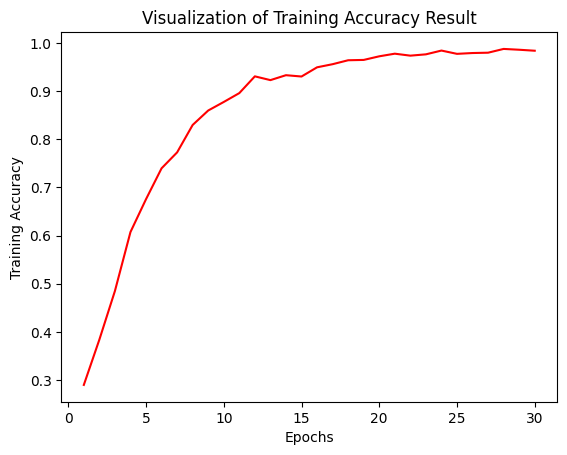

In [ ]:
epochs=[i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title("Visualization of Training Accuracy Result")
plt.show()

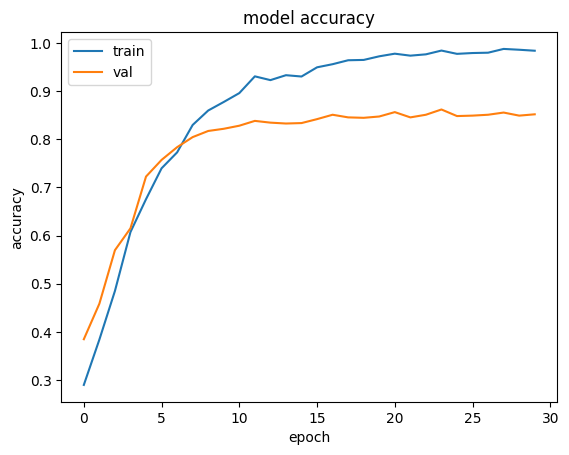

In [ ]:
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

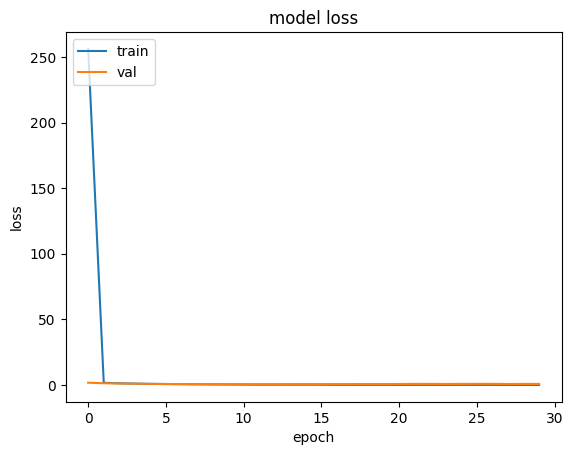

In [ ]:
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()